# TÉCNICA HOLDOUT

#### **Contextualização**

Neste projeto, simulamos um cenário fictício dentro da empresa TechInova, onde são registradas informações sobre a quantidade produzida de três produtos (A, B e C) junto com o custo total de produção. Esses dados estão organizados em um arquivo chamado df_producao.xlsx.

O principal objetivo desta análise é utilizar um modelo de árvore de decisão regressora para prever o custo de produção com base nas quantidades fabricadas de cada produto. Para avaliar a qualidade do modelo, aplicamos a técnica de validação conhecida como holdout, separando os dados em conjuntos de treino e teste.

*Observação: o conjunto de dados utilizado neste exercício foi disponibilizado como parte do conteúdo da disciplina FEQ 0480.*

In [1]:
# Importação das bibliotecas
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Carregamento do banco de dados
df = pd.read_excel('df_producao.xlsx')

In [3]:
# Pré processamento dos dados
df.head()

,A [ton],B [ton],C [ton],Custo [R$]
0,2.928480,1.333998,5.876517,14111.704342
1,2.960650,1.350564,5.787891,14227.445739
2,2.878867,1.415721,5.854093,14682.045618
3,2.785692,1.390491,5.784271,14403.161300
4,2.971348,1.363153,6.147458,14455.200718


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   A [ton]     100 non-null    float64
 1   B [ton]     100 non-null    float64
 2   C [ton]     100 non-null    float64
 3   Custo [R$]  100 non-null    float64
dtypes: float64(4)
memory usage: 3.3 KB


In [5]:
df.shape

(100, 4)

In [6]:
df.describe()

,A [ton],B [ton],C [ton],Custo [R$]
count,100.000000,100.000000,100.000000,100.000000
mean,4.390346,1.887365,6.408860,19471.582249
std,0.883476,0.242703,0.659335,2586.253075
min,2.785692,1.333998,5.421825,14111.704342
25%,3.589036,1.695546,5.868015,17345.106065
50%,4.434755,1.972123,6.200155,20121.546648
75%,5.191897,2.086410,6.811179,21813.377971
max,5.901724,2.199962,7.931872,22941.927896


<Axes: >

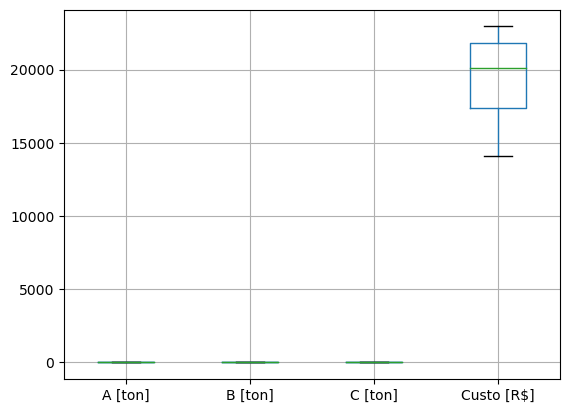

In [7]:
df.boxplot()

In [8]:
df.columns

Index(['A [ton]', 'B [ton]', 'C [ton]', 'Custo [R$]'], dtype='object')

In [9]:
# Separar as varias features (X) e target (y)
X = df.drop(['Custo [R$]'], axis=1)
y = df[['Custo [R$]']]

In [10]:
# Normalização dos dados de entrada (x) e saída (y)
scaler_input = MinMaxScaler(feature_range=(-1,1))
scaler_input.fit(X)

X_norm = scaler_input.transform(X)

scaler_output = MinMaxScaler(feature_range=(-1,1))
scaler_output.fit(y)

y_norm = scaler_output.transform(y)

In [11]:
# Avaliação da performance do modelo de predição
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, train_size=0.7, random_state=50)

In [12]:
# Definição do modelo
model = DecisionTreeRegressor(random_state=50)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=50)

In [13]:
# Calculando a métrica de desmpenho do modelo a partir do subocnjunto de dados não utilizado no treinamento:
y_pred = model.predict(X_test)

score = mean_squared_error(y_test, y_pred)

print(f'MSE = {score}')

MSE = 0.005731832519201044
